<a href="https://colab.research.google.com/github/jbq2/CS301-101-team7_SemanticSegmentation/blob/milestone-4-temp-1/CS301_101_TermProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# required installation of all dependencies required
!pip install sklearn
!pip install numpy
!pip install matplotlib
!pip install patchify
!pip install Pillow
!pip install segmentation_models
!pip install keras
!pip install opencv-python
!pip install pyngrok
!pip install hpbandster
!pip install ConfigSpace

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=13e597838386f2f5755d5020edef59f914ef2b4de64a2ec978e48817fc857d0f
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 8.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-pytho

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Installing NNI and loading interface with ngrok

!pip install nni
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip # download ngrok and unzip it
!unzip ngrok-stable-linux-amd64.zip
!pip install pyngrok
!mkdir -p nni_repo
!git clone https://github.com/microsoft/nni.git nni_repo/nni # clone NNI's offical repo to get examples
!ngrok authtoken 2GmpXSplbu5kON4LBKYMX4BLUrc_HRnx32rrQa8XnSaMQhHQ
!nnictl create --config nni_repo/nni/examples/trials/mnist-pytorch/config.yml --port 5001 &
get_ipython().system_raw('./ngrok http 5001 &')
!curl -s http://localhost:4040/api/tunnels # don't change the port number 4040
# Link to NNI Interface - link following "public_url" in last line of output (https://xxxx-xx-xx-xx-xxx.ngrok.io)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56.0 MB 354 kB/s 
     |████████████████████████████████| 106 kB 96.0 MB/s 
     |████████████████████████████████| 51 kB 9.2 MB/s 
     |████████████████████████████████| 139 kB 77.0 MB/s 
     |████████████████████████████████| 127 kB 80.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
--2022-12-04 02:32:01--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.161.241.46, 54.237.133.81, 52.202.168.65, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.161.241.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13

In [ ]:
!nnictl stop --all  # command to stop all experiments

In [ ]:
!mkdir ~/.kaggle

from google.colab import drive
drive.mount('/content/drive')

! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d humansintheloop/semantic-segmentation-of-aerial-imagery
! unzip semantic-segmentation-of-aerial-imagery.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Mounted at /content/drive
 24% 7.00M/29.6M [00:00<00:00, 72.5MB/s]
100% 29.6M/29.6M [00:00<00:00, 160MB/s] 
Archive:  semantic-segmentation-of-aerial-imagery.zip
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_001.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_002.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_003.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_004.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_005.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_006.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_007.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_008.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_009.jpg  
  inflating: Semantic segmentation dataset/Tile 1/masks/image_part_001.png  

In [2]:
# Downloading dataset from kaggle (peter's code)
!mkdir ~/.kaggle
!mv ~/../content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d humansintheloop/semantic-segmentation-of-aerial-imagery
!unzip semantic-segmentation-of-aerial-imagery.zip

 57% 17.0M/29.6M [00:00<00:00, 174MB/s]
100% 29.6M/29.6M [00:00<00:00, 228MB/s]
Archive:  semantic-segmentation-of-aerial-imagery.zip
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_001.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_002.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_003.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_004.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_005.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_006.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_007.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_008.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_009.jpg  
  inflating: Semantic segmentation dataset/Tile 1/masks/image_part_001.png  
  inflating: Semantic segmentation dataset/Tile 1/masks/image_part_002.png  
  inflatin

In [ ]:
"""
This block of code will be for HPO.
HPO using HpBandster BOHB. 
First, set up a worker; workers will evaluate a hyperparam setting
and return the associated minimized loss from that setting.
"""

import numpy as np
import time
import socket, os

import ConfigSpace as cs
from hpbandster.core.worker import Worker

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras import backend as K


class MyWorker(Worker):
    def __init__(self, *args, sleep_interval=0, **kwargs):
        """
        TODO:

        Load data here.
        Basically the part where we set up the images and 
        matrices to train the model with.

        Not exatly sure what parts will need to be copied and
        pasted though.
        
        Still gotta figure this out
        """

        super().__init__(**kwargs)

        # what i got from the example is that we can preprocess
        # data in another block and make the dataset variables global
        # in this function, and set them to the self.data variables:

        global X_train, X_test, y_train, y_test

        self.img_rows = self.img_cols = 256
        self.x_train, self.y_train = X_train, y_train
        self.x_test, self.y_test   = X_test, y_test

    def compute(self, config, budget, **kwargs):
        """
        TODO: 

        This compute function is required since MyWorker extends Worker.
        Compute will be called repeatedly during optimization.

        config: dictionary containing sampled hyperparam configs.
        budget: amount of epochs the model will use to train (not sure
        how this will go because one of our hyperparams is # of epochs).

        Basically will be a copy and paste the following parts
        of fitting the data to the model:
        - initalizing weights
        - total loss = dice loss + focal loss
        - getting image dimensions (requires __init__ to load data)
        - get the simple multi unet model
        - compile it using the config hyperparams
        - model.fit
        """
        def jacard_coef(y_true, y_pred):
            y_true_f = K.flatten(y_true)
            y_pred_f = K.flatten(y_pred)
            intersection = K.sum(y_true_f * y_pred_f)
            return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)


        def multi_unet_model(n_classes=4, IMG_HEIGHT=256, IMG_WIDTH=256, IMG_CHANNELS=1):
        #Build the model
            inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
            #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
            s = inputs

            #Contraction path
            c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
            c1 = Dropout(0.2)(c1)  # Original 0.1
            c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
            p1 = MaxPooling2D((2, 2))(c1)
            
            c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
            c2 = Dropout(0.2)(c2)  # Original 0.1
            c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
            p2 = MaxPooling2D((2, 2))(c2)
            
            c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
            c3 = Dropout(0.2)(c3)
            c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
            p3 = MaxPooling2D((2, 2))(c3)
            
            c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
            c4 = Dropout(0.2)(c4)
            c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
            p4 = MaxPooling2D(pool_size=(2, 2))(c4)
            
            c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
            c5 = Dropout(0.3)(c5)
            c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
            
            #Expansive path 
            u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
            u6 = concatenate([u6, c4])
            c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
            c6 = Dropout(0.2)(c6)
            c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
            
            u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
            u7 = concatenate([u7, c3])
            c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
            c7 = Dropout(0.2)(c7)
            c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
            
            u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
            u8 = concatenate([u8, c2])
            c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
            c8 = Dropout(0.2)(c8)  # Original 0.1
            c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
            
            u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
            u9 = concatenate([u9, c1], axis=3)
            c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
            c9 = Dropout(0.2)(c9)  # Original 0.1
            c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
            
            outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c9)
            
            model = Model(inputs=[inputs], outputs=[outputs])
            
            #NOTE: Compile the model in the main program to make it easy to test with various loss functions
            #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
            
            #model.summary()
            
            return model

        
        def get_model():
            return multi_unet_model(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)


        # defining weights and total_loss
        weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]
        dice_loss = sm.losses.DiceLoss(class_weights=weights)  # loss function that is widely used in computer vision: calculates similarity between 2 images 
        focal_loss = sm.losses.CategoricalFocalLoss()  # improved cross entropy loss function: adds more weight to easily misclassified examples
        total_loss = dice_loss + (1 * focal_loss)  # overall loss function combines dice_loss and focal_loss

        IMG_HEIGHT = X_train.shape[1]
        IMG_WIDTH  = X_train.shape[2]
        IMG_CHANNELS = X_train.shape[3]

        # getting multi unet model
        model = get_model()

        # defining optimizer based on config
        if config['optimizer'] == 'adam':
            Optimizer = keras.optimizers.Adam(lr=config['learning_rate'])
        else:
            Optimizer = keras.optimizers.SGD(lr=config['learning_rate'], momentum=config['sgd_momentum'])

        # compiling with config hyperparams
        model.compile(loss=total_loss,
                      optimizer=Optimizer,
                      metrics=[keras.metrics.Precision(), keras.metrics.Recall()])

        # fitting model with config
        history = model.fit(self.x_train, self.y_train,
                      batch_size=config['batch_size'],
                      epochs=int(budget),
                      # epochs=config['epochs'],
                      verbose=1,
                      validation_data=(self.x_test, self.y_test),
                      shuffle=False)

        # get train and test accuracy
        train_score = 1 - sum(history.history['loss']) / len(history.history['loss'])
        test_score = 1 - sum(history.history['val_loss']) / len(history.history['val_loss'])

        #import IPython; IPython.embed()
        return ({
                'loss': 1 - test_score, # remember: HpBandSter always minimizes!
                'info': {       
                    'test accuracy': test_score,
                    'train accuracy': train_score
                }
        })


    @staticmethod
    def get_configspace():
        """
        Hyperparameters of interest:
            - learning rate
            - optimizer (sgd or adam)
            - sgd_momentum
            - batch size
        """
        config_space = cs.ConfigurationSpace()
        learning_rate = cs.hyperparameters.UniformFloatHyperparameter('learning_rate', lower=0.0001, upper=0.1, default_value=0.001, log=True)
        optimizer = cs.hyperparameters.CategoricalHyperparameter('optimizer', ['adam', 'sgd'])
        sgd_momentum = cs.hyperparameters.UniformFloatHyperparameter('sgd_momentum', lower=0.0, upper=0.99, default_value=0.9, log=False)
        batch_size = cs.hyperparameters.UniformIntegerHyperparameter('batch_size', lower=1, upper=32, default_value=16)
        # epochs = cs.hyperparameters.UniformIntegerHyperparameter('epochs', lower=30, upper=100, default_value=100)
        config_space.add_hyperparameters([learning_rate, optimizer, sgd_momentum, batch_size])
        return config_space

        

In [ ]:
from hpbandster.optimizers.bohb import BOHB
from hpbandster.core.nameserver import NameServer
import socket, os

NS = NameServer(run_id='example1', host='127.0.0.1', port=None)
NS.start()

worker = MyWorker(sleep_interval=0, nameserver='127.0.0.1', run_id='example1')
worker.run(background=True)
bohb = BOHB(configspace=worker.get_configspace(), run_id='example1', 
            nameserver='127.0.0.1', min_budget=30, max_budget=100)
result = bohb.run(n_iterations=5)

bohb.shutdown(shutdown_workers=True)
NS.shutdown()

print(result.get_all_runs())
print(result.get_pandas_dataframe())

## HPO Using BOHB (n = 5 iterations) Results:
![image](https://user-images.githubusercontent.com/98120760/202880199-55c25870-e8a9-4223-afec-aa84356bd939.png)

In [ ]:
# the last iteration of successive halving will be used
# assuming that after using BO-HB, the resulting config space is the most optimal

data_35_successive_halving_iterations=[
    {'batch_size': 25, 'learning_rate': 0.010423454645547298, 'optimizer': 'adam', 'sgd_momentum': 0.43521186058412903, 'budget': 25, 'loss': 1.2951, 'val_loss': 1.2842, 'precision': 0.54, 'recall': 0.54},
    {'batch_size': 26, 'learning_rate': 0.0006325494254217899, 'optimizer': 'sgd', 'sgd_momentum': 0.20260222918369616, 'budget': 25, 'loss': 1.0178, 'val_loss': 1.0177, 'precision': 0.9038, 'recall': 0.0000318},
    {'batch_size': 30, 'learning_rate': 0.006410637905687802, 'optimizer': 'sgd', 'sgd_momentum': 0.10204604192227403, 'budget': 25, 'loss': 1.0010, 'val_loss': 0.9982, 'precision': 0.8050, 'recall': 0.4666},
    {'batch_size': 30, 'learning_rate': 0.006410637905687802, 'optimizer': 'sgd', 'sgd_momentum': 0.10204604192227403, 'budget': 75, 'loss': 0.9958, 'val_loss': 0.9939, 'precision': 0.8305, 'recall': 0.4423},
    {'batch_size': 6, 'learning_rate': 0.00044712998042093497, 'optimizer': 'sgd', 'sgd_momentum': 0.6244634986402445, 'budget': 75, 'loss': 0.9970, 'val_loss': 0.9962, 'precision': 0.8313, 'recall': 0.4437},
    {'batch_size': 30, 'learning_rate': 0.0002555337726396552, 'optimizer': 'adam', 'sgd_momentum': 0.11425434943877688, 'budget': 75, 'loss': 0.8888, 'val_loss': 0.9412, 'precision': 0.8058, 'recall': 0.7889},
    {'batch_size': 24, 'learning_rate': 0.0012444573981454413, 'optimizer': 'adam', 'sgd_momentum': 0.22181057142726812, 'budget': 25, 'loss': 0.9066, 'val_loss': 0.9241, 'precision': 0.8336, 'recall': 0.8034},
    {'batch_size': 11, 'learning_rate': 0.000921560725725206, 'optimizer': 'sgd', 'sgd_momentum': 0.28005263182984264, 'budget': 25, 'loss': 1.0055, 'val_loss': 1.0026, 'precision': 0.8369, 'recall': 0.4438},
    {'batch_size': 26, 'learning_rate': 0.0008617202284439472, 'optimizer': 'sgd', 'sgd_momentum': 0.9596310724837166, 'budget': 25, 'loss': 0.9940, 'val_loss': 0.9922, 'precision': 0.8025, 'recall': 0.4704},
    {'batch_size': 24, 'learning_rate': 0.0012444573981454413, 'optimizer': 'adam', 'sgd_momentum': 0.22181057142726812, 'budget': 75, 'loss': 0.8981, 'val_loss': 0.9126, 'precision': 0.8549, 'recall': 0.8328},
    {'batch_size': 23, 'learning_rate': 0.012702172114669764, 'optimizer': 'adam', 'sgd_momentum': 0.5591241916566293, 'budget': 75, 'loss': 0.9411, 'val_loss': 0.9445, 'precision': 0.7746, 'recall': 0.7079},
    {'batch_size': 9, 'learning_rate': 0.05169249868326114, 'optimizer': 'sgd', 'sgd_momentum': 0.36091461749398956, 'budget': 75, 'loss': 0.9234, 'val_loss': 0.9470, 'precision': 0.7787, 'recall': 0.7364},
    {'batch_size': 11, 'learning_rate': 0.00393196591281057, 'optimizer': 'adam', 'sgd_momentum': 0.392466295122575, 'budget': 25, 'loss': 0.9144, 'val_loss': 0.9203, 'precision': 0.8297, 'recall': 0.7990},
    {'batch_size': 7, 'learning_rate': 0.005020592553323891, 'optimizer': 'adam', 'sgd_momentum': 0.4285698435087847, 'budget': 25, 'loss': 0.9395, 'val_loss': 0.9389, 'precision': 0.8032, 'recall': 0.7463},
    {'batch_size': 25, 'learning_rate': 0.033130188028715805, 'optimizer': 'sgd', 'sgd_momentum': 0.7767336836177672, 'budget': 25, 'loss': 0.9536, 'val_loss': 0.9662, 'precision': 0.7420, 'recall': 0.6090},
    {'batch_size': 11, 'learning_rate': 0.00393196591281057, 'optimizer': 'adam', 'sgd_momentum': 0.392466295122575, 'budget': 75, 'loss': 0.9130, 'val_loss': 0.9147, 'precision': 0.8437, 'recall': 0.8106},
    {'batch_size': 23, 'learning_rate': 0.0032847542515781567, 'optimizer': 'adam', 'sgd_momentum': 0.8016755715024376, 'budget': 75, 'loss': 0.9001, 'val_loss': 0.9171, 'precision': 0.8321, 'recall': 0.8160},
    {'batch_size': 26, 'learning_rate': 0.004794279849735609, 'optimizer': 'sgd', 'sgd_momentum': 0.12276821185304304, 'budget': 75, 'loss': 0.9952, 'val_loss': 0.9940, 'precision': 0.8080, 'recall': 0.4617},
    {'batch_size': 1, 'learning_rate': 0.035252990416093734, 'optimizer': 'adam', 'sgd_momentum': 0.9226147983361845, 'budget': 25, 'loss': 1.5115, 'val_loss': 1.5067, 'precision': 0.1425, 'recall': 0.1425},
    {'batch_size': 24, 'learning_rate': 0.000504924978646984, 'optimizer': 'sgd', 'sgd_momentum': 0.9886347100920375, 'budget': 25, 'loss': 0.9943, 'val_loss': 0.9932, 'precision': 0.8296, 'recall': 0.4517},
    {'batch_size': 28, 'learning_rate': 0.061566996059290544, 'optimizer': 'sgd', 'sgd_momentum': 0.9387601099445818, 'budget': 25, 'loss': 0.9362, 'val_loss': 0.9512, 'precision': 0.7744, 'recall': 0.6954},
    {'batch_size': 28, 'learning_rate': 0.061566996059290544, 'optimizer': 'sgd', 'sgd_momentum': 0.9387601099445818, 'budget': 75, 'loss': 0.9148, 'val_loss': 0.9287, 'precision': 0.8206, 'recall': 0.7839},
    {'batch_size': 24, 'learning_rate': 0.00012765657043279643, 'optimizer': 'adam', 'sgd_momentum': 0.06482325264227154, 'budget': 75, 'loss': 0.8963, 'val_loss': 0.9619, 'precision': 0.7486, 'recall': 0.7406},
    {'batch_size': 29, 'learning_rate': 0.000362997661710239, 'optimizer': 'adam', 'sgd_momentum': 0.980606513386686, 'budget': 75, 'loss': 0.8727, 'val_loss': 0.9247, 'precision': 0.8294, 'recall': 0.8178},
    {'batch_size': 27, 'learning_rate': 0.000559449566703158, 'optimizer': 'adam', 'sgd_momentum': 0.8351797515182519, 'budget': 25, 'loss': 0.9087, 'val_loss': 0.9307, 'precision': 0.8155, 'recall': 0.7799},
    {'batch_size': 30, 'learning_rate': 0.00020648284618882698, 'optimizer': 'sgd', 'sgd_momentum': 0.15901342208840763, 'budget': 25, 'loss': 1.0212, 'val_loss': 1.0226, 'precision': 0., 'recall': 0.},
    {'batch_size': 24, 'learning_rate': 0.02619168430040626, 'optimizer': 'sgd', 'sgd_momentum': 0.08896231525961767, 'budget': 25, 'loss': 0.9909, 'val_loss': 0.9900, 'precision': 0.8293, 'recall': 0.4482},
    {'batch_size': 27, 'learning_rate': 0.000559449566703158, 'optimizer': 'adam', 'sgd_momentum': 0.8351797515182519, 'budget': 75, 'loss': 0.8792, 'val_loss': 0.9177, 'precision': 0.8431, 'recall': 0.8303},
    {'batch_size': 30, 'learning_rate': 0.0003735348770269236, 'optimizer': 'adam', 'sgd_momentum': 0.8584977116587138, 'budget': 75, 'loss': 0.8828, 'val_loss': 0.9210, 'precision': 0.8303, 'recall': 0.8167},
    {'batch_size': 31, 'learning_rate': 0.0003401549016294108, 'optimizer': 'adam', 'sgd_momentum': 0.9254391870088128, 'budget': 75, 'loss': 0.8739, 'val_loss': 0.9247, 'precision': 0.8335, 'recall': 0.8183},
    {'batch_size': 11, 'learning_rate': 0.006379790977696792, 'optimizer': 'adam', 'sgd_momentum': 0.18897151412792534, 'budget': 25, 'loss': 0.9218, 'val_loss': 0.9277, 'precision': 0.8166, 'recall': 0.7696},
    {'batch_size': 23, 'learning_rate': 0.0029896701407367146, 'optimizer': 'sgd', 'sgd_momentum': 0.5460870135101618, 'budget': 25, 'loss': 1.0035, 'val_loss': 1.0015, 'precision': 0.8820, 'recall': 0.3698},
    {'batch_size': 6, 'learning_rate': 0.002547859030004373, 'optimizer': 'adam', 'sgd_momentum': 0.05517169349458934, 'budget': 25, 'loss': 0.9233, 'val_loss': 0.9271, 'precision': 0.8403, 'recall': 0.7984},
    {'batch_size': 11, 'learning_rate': 0.006379790977696792, 'optimizer': 'adam', 'sgd_momentum': 0.18897151412792534, 'budget': 75, 'loss': 0.9160, 'val_loss': 0.9216, 'precision': 0.8296, 'recall': 0.7942},
    {'batch_size': 9, 'learning_rate': 0.004740049723020277, 'optimizer': 'adam', 'sgd_momentum': 0.08967610463914634, 'budget': 75, 'loss': 0.9149, 'val_loss': 0.9198, 'precision': 0.8337, 'recall': 0.7966}
]

In [ ]:
# simple_multi_unet_model.py

# https://youtu.be/jvZm8REF2KY
"""
Standard Unet
Model not compiled here, instead will be done externally to make it
easy to test various loss functions and optimizers. 
"""


from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras import backend as K

def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)



################################################################
def multi_unet_model(n_classes=4, IMG_HEIGHT=256, IMG_WIDTH=256, IMG_CHANNELS=1):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.2)(c1)  # Original 0.1
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.2)(c2)  # Original 0.1
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    #Expansive path 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.2)(c8)  # Original 0.1
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.2)(c9)  # Original 0.1
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    
    #NOTE: Compile the model in the main program to make it easy to test with various loss functions
    #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    #model.summary()
    
    return model
 

# 228_training_aerial_imagery.py

# https://youtu.be/jvZm8REF2KY
"""
Explanation of using RGB masks: https://youtu.be/sGAwx4GMe4E

https://www.kaggle.com/humansintheloop/semantic-segmentation-of-aerial-imagery

The dataset consists of aerial imagery of Dubai obtained by MBRSC satellites and annotated with pixel-wise semantic segmentation in 6 classes. The total volume of the dataset is 72 images grouped into 6 larger tiles. The classes are:

Building: #3C1098
Land (unpaved area): #8429F6
Road: #6EC1E4
Vegetation: #FEDD3A
Water: #E2A929
Unlabeled: #9B9B9B

Use patchify....
Tile 1: 797 x 644 --> 768 x 512 --> 6
Tile 2: 509 x 544 --> 512 x 256 --> 2
Tile 3: 682 x 658 --> 512 x 512  --> 4
Tile 4: 1099 x 846 --> 1024 x 768 --> 12
Tile 5: 1126 x 1058 --> 1024 x 1024 --> 16
Tile 6: 859 x 838 --> 768 x 768 --> 9
Tile 7: 1817 x 2061 --> 1792 x 2048 --> 56
Tile 8: 2149 x 1479 --> 1280 x 2048 --> 40
Total 9 images in each folder * (145 patches) = 1305
Total 1305 patches of size 256x256

"""

# import statements; had to change tensorflow keras metrics import
# proper path to keras metrics is tensorflow/python/keras/metrics
import os
import cv2
import numpy as np

from matplotlib import pyplot as plt
from patchify import patchify
from PIL import Image
import segmentation_models as sm
from tensorflow.python.keras.metrics import MeanIoU
import keras

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()

root_directory = 'Semantic segmentation dataset/'  # idt this is the right root directory for us

patch_size = 256

#Read images from repsective 'images' subdirectory
#As all images are of ddifferent size we have 2 options, either resize or crop
#But, some images are too large and some small. Resizing will change the size of real objects.
#Therefore, we will crop them to a nearest size divisible by 256 and then 
#divide all images into patches of 256x256x3. 

image_dataset = []  
for path, subdirs, files in os.walk(root_directory):
    #print(files)  
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'images':   #Find all 'images' directories
        images = os.listdir(path)  #List of all image names in this subdirectory
        images = sorted(images)
        for i, image_name in enumerate(images):  
            if image_name.endswith(".jpg"):   #Only read jpg images...
                #print(image_name)
                image = cv2.imread(path+"/"+image_name, 1)  #Read each image as BGR
                SIZE_X = (image.shape[1]//patch_size)*patch_size #Nearest size divisible by our patch size
                SIZE_Y = (image.shape[0]//patch_size)*patch_size #Nearest size divisible by our patch size
                image = Image.fromarray(image)
                image = image.crop((0 ,0, SIZE_X, SIZE_Y))  #Crop from top left corner
                #image = image.resize((SIZE_X, SIZE_Y))  #Try not to resize for semantic segmentation
                image = np.array(image)             
       
                #Extract patches from each image
                #print("Now patchifying image:", path+"/"+image_name)
                patches_img = patchify(image, (patch_size, patch_size, 3), step=patch_size)  #Step=256 for 256 patches means no overlap
        
                for i in range(patches_img.shape[0]):
                    for j in range(patches_img.shape[1]):
                        
                        single_patch_img = patches_img[i,j,:,:]
                        
                        #Use minmaxscaler instead of just dividing by 255. 
                        single_patch_img = scaler.fit_transform(single_patch_img.reshape(-1, single_patch_img.shape[-1])).reshape(single_patch_img.shape)
                        
                        #single_patch_img = (single_patch_img.astype('float32')) / 255. 
                        single_patch_img = single_patch_img[0] #Drop the extra unecessary dimension that patchify adds.                               
                        image_dataset.append(single_patch_img)
                
  
                
  
 #Now do the same as above for masks
 #For this specific dataset we could have added masks to the above code as masks have extension png
mask_dataset = []  
for path, subdirs, files in os.walk(root_directory):
    #print(files)    
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'masks':   #Find all 'images' directories
        masks = os.listdir(path)  #List of all image names in this subdirectory
        masks = sorted(masks)
        for i, mask_name in enumerate(masks):  
            if mask_name.endswith(".png"):   #Only read png images... (masks in this dataset)
                #print(mask_name)
                mask = cv2.imread(path+"/"+mask_name, 1)  #Read each image as Grey (or color but remember to map each color to an integer)
                mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
                SIZE_X = (mask.shape[1]//patch_size)*patch_size #Nearest size divisible by our patch size
                SIZE_Y = (mask.shape[0]//patch_size)*patch_size #Nearest size divisible by our patch size
                mask = Image.fromarray(mask)
                mask = mask.crop((0 ,0, SIZE_X, SIZE_Y))  #Crop from top left corner
                #mask = mask.resize((SIZE_X, SIZE_Y))  #Try not to resize for semantic segmentation
                mask = np.array(mask)             
       
                #Extract patches from each image
                #print("Now patchifying mask:", path+"/"+mask_name)
                patches_mask = patchify(mask, (patch_size, patch_size, 3), step=patch_size)  #Step=256 for 256 patches means no overlap
        
                for i in range(patches_mask.shape[0]):
                    for j in range(patches_mask.shape[1]):
                        
                        single_patch_mask = patches_mask[i,j,:,:]
                        #single_patch_img = (single_patch_img.astype('float32')) / 255. #No need to scale masks, but you can do it if you want
                        single_patch_mask = single_patch_mask[0] #Drop the extra unecessary dimension that patchify adds.                               
                        mask_dataset.append(single_patch_mask) 
 
image_dataset = np.array(image_dataset)
mask_dataset =  np.array(mask_dataset)

#Sanity check, view few mages -- commented this out to reduce output size
import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(image_dataset[image_number], (patch_size, patch_size, 3)))  # throwing an out of bounds error
plt.subplot(122)
plt.imshow(np.reshape(mask_dataset[image_number], (patch_size, patch_size, 3)))
plt.show()


###########################################################################
"""
RGB to HEX: (Hexadecimel --> base 16)
This number divided by sixteen (integer division; ignoring any remainder) gives 
the first hexadecimal digit (between 0 and F, where the letters A to F represent 
the numbers 10 to 15). The remainder gives the second hexadecimal digit. 
0-9 --> 0-9
10-15 --> A-F

Example: RGB --> R=201, G=, B=

R = 201/16 = 12 with remainder of 9. So hex code for R is C9 (remember C=12)

Calculating RGB from HEX: #3C1098
3C = 3*16 + 12 = 60
10 = 1*16 + 0 = 16
98 = 9*16 + 8 = 152

"""
#Convert HEX to RGB array
# Try the following to understand how python handles hex values...
a=int('3C', 16)  #3C with base 16. Should return 60. 
# print(a) # commented this out
#Do the same for all RGB channels in each hex code to convert to RGB
Building = '#3C1098'.lstrip('#')
Building = np.array(tuple(int(Building[i:i+2], 16) for i in (0, 2, 4))) # 60, 16, 152

Land = '#8429F6'.lstrip('#')
Land = np.array(tuple(int(Land[i:i+2], 16) for i in (0, 2, 4))) #132, 41, 246

Road = '#6EC1E4'.lstrip('#') 
Road = np.array(tuple(int(Road[i:i+2], 16) for i in (0, 2, 4))) #110, 193, 228

Vegetation =  'FEDD3A'.lstrip('#') 
Vegetation = np.array(tuple(int(Vegetation[i:i+2], 16) for i in (0, 2, 4))) #254, 221, 58

Water = 'E2A929'.lstrip('#') 
Water = np.array(tuple(int(Water[i:i+2], 16) for i in (0, 2, 4))) #226, 169, 41

Unlabeled = '#9B9B9B'.lstrip('#') 
Unlabeled = np.array(tuple(int(Unlabeled[i:i+2], 16) for i in (0, 2, 4))) #155, 155, 155

label = single_patch_mask

# Now replace RGB to integer values to be used as labels.
#Find pixels with combination of RGB for the above defined arrays...
#if matches then replace all values in that pixel with a specific integer
def rgb_to_2D_label(label):
    """
    Suply our labale masks as input in RGB format. 
    Replace pixels with specific RGB values ...
    """
    label_seg = np.zeros(label.shape,dtype=np.uint8)
    label_seg [np.all(label == Building,axis=-1)] = 0
    label_seg [np.all(label==Land,axis=-1)] = 1
    label_seg [np.all(label==Road,axis=-1)] = 2
    label_seg [np.all(label==Vegetation,axis=-1)] = 3
    label_seg [np.all(label==Water,axis=-1)] = 4
    label_seg [np.all(label==Unlabeled,axis=-1)] = 5
    
    label_seg = label_seg[:,:,0]  #Just take the first channel, no need for all 3 channels
    
    return label_seg

labels = []
for i in range(mask_dataset.shape[0]):
    label = rgb_to_2D_label(mask_dataset[i])
    labels.append(label)    

labels = np.array(labels)   
labels = np.expand_dims(labels, axis=3)
 

# print("Unique labels in label dataset are: ", np.unique(labels)) # commented this out

#Another Sanity check, view few mages - commented this out to reduce the output size

import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_dataset[image_number])
plt.subplot(122)
plt.imshow(labels[image_number][:,:,0])
plt.show()


############################################################################


n_classes = len(np.unique(labels))
from keras.utils import to_categorical
labels_cat = to_categorical(labels, num_classes=n_classes)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, labels_cat, test_size = 0.20, random_state = 42)


In [ ]:
#######################################
#Parameters for model
# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
# set class weights for dice_loss
# from sklearn.utils.class_weight import compute_class_weight

# weights = compute_class_weight('balanced', np.unique(np.ravel(labels,order='C')), 
#                               np.ravel(labels,order='C'))
# print(weights)

weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]
dice_loss = sm.losses.DiceLoss(class_weights=weights)  # loss function that is widely used in computer vision: calculates similarity between 2 images 
focal_loss = sm.losses.CategoricalFocalLoss()  # improved cross entropy loss function: adds more weight to easily misclassified examples
total_loss = dice_loss + (1 * focal_loss)  # overall loss function combines dice_loss and focal_loss


IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]

# from simple_multi_unet_model import multi_unet_model, jacard_coef  (not required because they are defined in a prev code block)

metrics=['accuracy', jacard_coef]

def get_teacher_model():
    return multi_unet_model(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)

opt = keras.optimizers.Adam(lr=0.004740049723020277)
model = get_teacher_model()
model.compile(optimizer=opt, loss=total_loss, metrics=[keras.metrics.Precision(), keras.metrics.Recall()])
model.summary()


history1 = model.fit(X_train, y_train, 
                    batch_size = 9, 
                    verbose=1, 
                    epochs=100, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)


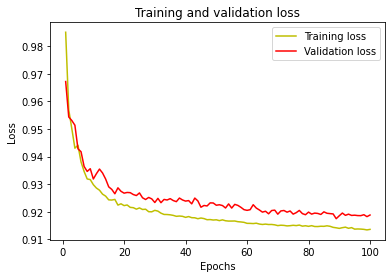

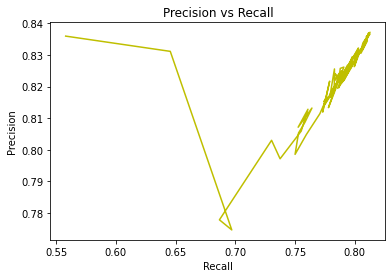

In [ ]:
###########################################################
#plot the training and validation accuracy and loss at each epoch
history = history1
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

precision = history.history['val_precision_2']
recall = history.history['val_recall_2']

plt.plot(recall, precision, 'y', label='Precision vs Recall')
plt.title('Precision vs Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [ ]:
# this code block prints predictions on all images of X_test
# 10 of the best will be chosen
# only the 10 best will be shown for easier viewing

import random
for i in range(len(X_test)):
  print("Prediction", i+1)
  test_img = X_test[i]
  ground_truth=y_test[i]
  #test_img_norm=test_img[:,:,0][:,:,None]
  test_img_input=np.expand_dims(test_img, 0)
  prediction = (model.predict(test_img_input))
  predicted_img=np.argmax(prediction, axis=3)[0,:,:]
  ground_truth=np.argmax(ground_truth, axis=2)[:,:]

  plt.figure(figsize=(12, 8))
  plt.subplot(231)
  plt.title('Testing Image')
  plt.imshow(test_img)
  plt.subplot(232)
  plt.title('Testing Label')
  plt.imshow(ground_truth)
  plt.subplot(233)
  plt.title('Prediction on test image')
  plt.imshow(predicted_img)
  plt.show()

1/1 [==============================] - 0s 23ms/step


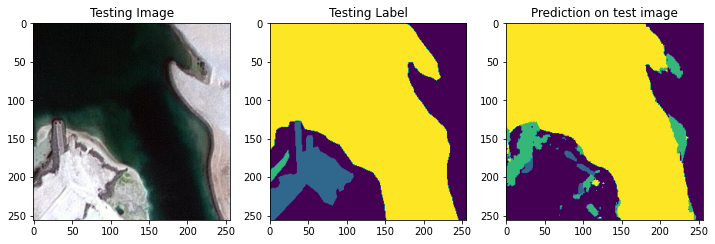

1/1 [==============================] - 0s 21ms/step


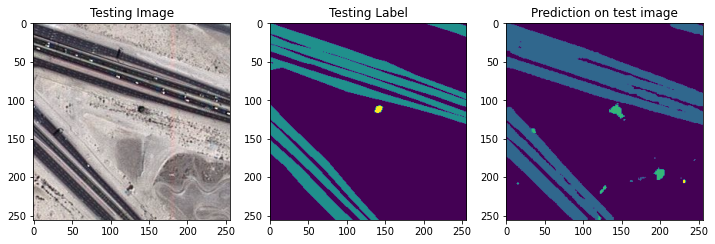

1/1 [==============================] - 0s 20ms/step


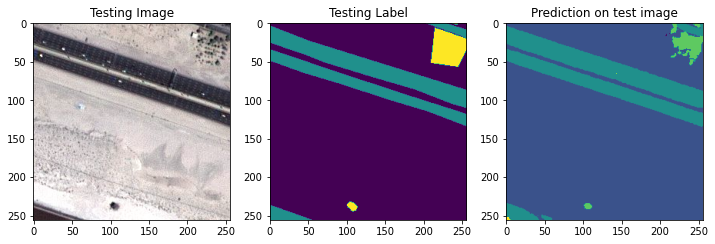

1/1 [==============================] - 0s 21ms/step


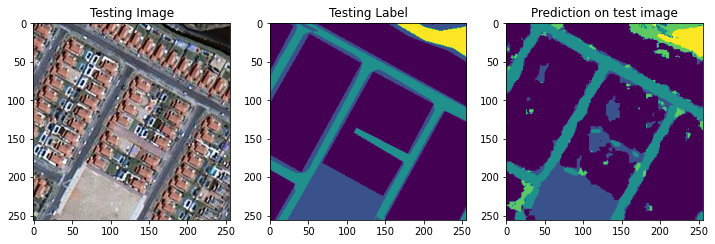

1/1 [==============================] - 0s 20ms/step


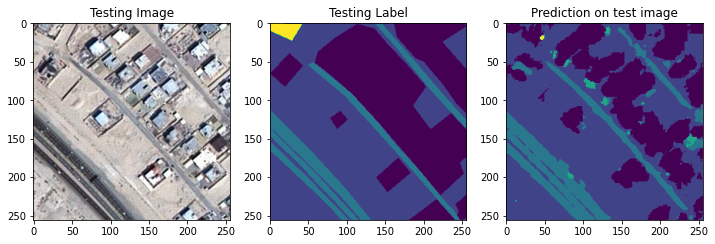

1/1 [==============================] - 0s 21ms/step


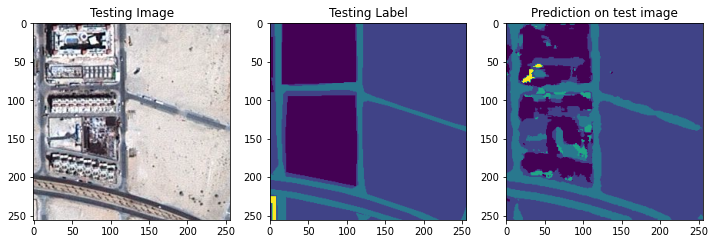

1/1 [==============================] - 0s 20ms/step


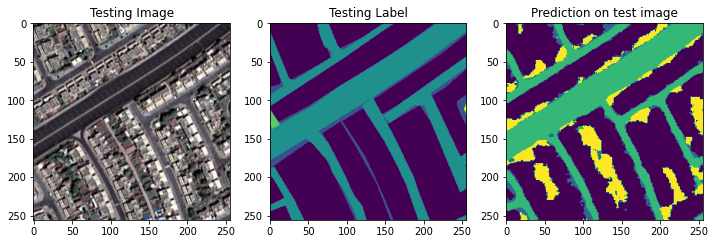

1/1 [==============================] - 0s 20ms/step


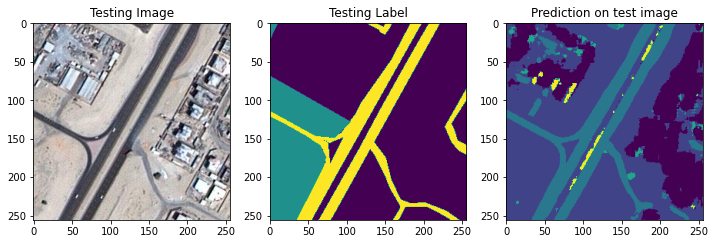

1/1 [==============================] - 0s 20ms/step


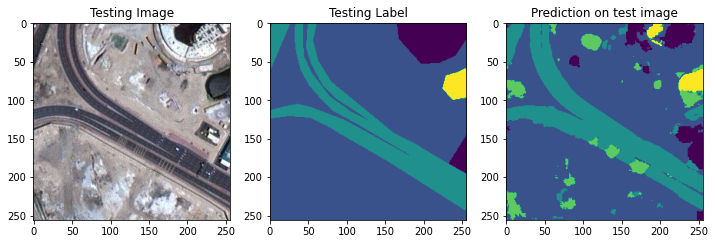

1/1 [==============================] - 0s 22ms/step


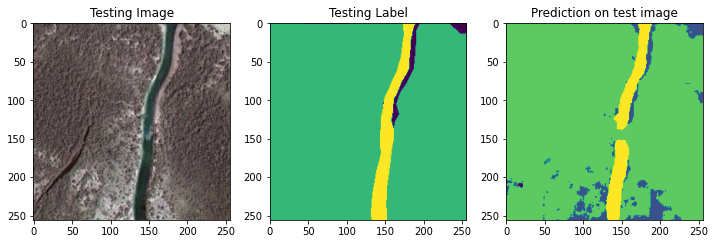

In [ ]:
# 10 of the best predictions:

best = [0, 150, 142, 136, 129, 246, 235, 219, 211, 168]
for i in best:
  test_img = X_test[i]
  ground_truth=y_test[i]
  #test_img_norm=test_img[:,:,0][:,:,None]
  test_img_input=np.expand_dims(test_img, 0)
  prediction = (model.predict(test_img_input))
  predicted_img=np.argmax(prediction, axis=3)[0,:,:]
  ground_truth=np.argmax(ground_truth, axis=2)[:,:]

  plt.figure(figsize=(12, 8))
  plt.subplot(231)
  plt.title('Testing Image')
  plt.imshow(test_img)
  plt.subplot(232)
  plt.title('Testing Label')
  plt.imshow(ground_truth)
  plt.subplot(233)
  plt.title('Prediction on test image')
  plt.imshow(predicted_img)
  plt.show()

In [ ]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras import backend as K

# Distller class for distilling the knowledge (applying the softmax stuff)
class Distiller(Model):
    def __init__(self, student, teacher):
        super(Distiller, self).__init__()
        self,teacher = teacher
        self.student = student
    
    def compile(self, optimizer, metrics, student_loss_fn, distillation_loss_fn, alpha=0.1, temperature=3):
        super(Distiller, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def train_step(self, data):
        x, y = data
        teacher_preds = self.teacher(x, training=False)
        with tf.GradientTape() as tape:
            student_preds = self.student(x, training=False)
            student_loss = self.student_loss_fn(y, student_preds)
            teacher_softmax = tf.nn.softmax(teacher_preds / self.temperature, axis=1)
            student_softmax = tf.nn.softmax(student_preds / self.temperature, axis=1)
            distillation_loss = self.distillation_loss_fn(teacher_softmax, student_softmax)
            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss
        
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        self.compiled_metrics.update_state(y, student_preds)
        results = {m.name: m.result() for m in self.metrics}
        results.update({"student_loss": student_loss, "distillation_loss": distillation_loss})
        return results
        



In [ ]:

# student of the multi_unet_model teacher model (has less filters per conv layer)
def student_multi_unet_model(n_classes=4, IMG_HEIGHT=256, IMG_WIDTH=256, IMG_CHANNELS=1):
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = inputs
    
    #Contraction path
    c1 = Conv2D(4, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.2)(c1)  # Original 0.1
    c1 = Conv2D(4, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.2)(c2)  # Original 0.1
    c2 = Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    #Expansive path 
    u6 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.2)(c8)  # Original 0.1
    c8 = Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = Conv2DTranspose(4, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(4, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.2)(c9)  # Original 0.1
    c9 = Conv2D(4, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    
    #NOTE: Compile the model in the main program to make it easy to test with various loss functions
    #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    #model.summary()
    
    return model


def get_student_model():
    return student_multi_unet_model(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)



In [ ]:
import pickle

teacher = get_teacher_model()
student = get_student_model()

! touch /content/drive/MyDrive/teacher_model.sav
opt = keras.optimizers.Adam(lr=0.004740049723020277)
teacher.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history1 = teacher.fit(X_train, y_train, 
                    batch_size = 9, 
                    verbose=1, 
                    epochs=100, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)
filename = 'teacher_model.sav'

In [ ]:
pickle.dump(teacher_model, open(filename, 'wb'))

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
tf.random.set_seed(3)

import os
import cv2
import numpy as np
import pdb

from matplotlib import pyplot as plt
from patchify import patchify
from PIL import Image
import segmentation_models as sm
from tensorflow.python.keras.metrics import MeanIoU
import keras

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras import backend as K

from sklearn.metrics import precision_score, recall_score

def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

scaler = MinMaxScaler()

root_directory = 'Semantic segmentation dataset/'  # idt this is the right root directory for us

patch_size = 256

class Distiller(keras.Model):
    def __init__(self, student, teacher):
        super(Distiller, self).__init__()
        self.teacher = teacher
        self.student = student

    def compile(
        self,
        optimizer,
        metrics,
        student_loss_fn,
        distillation_loss_fn,
        alpha=0.1,
        temperature=3,
    ):
        """ Configure the distiller.

        Args:
            optimizer: Keras optimizer for the student weights
            metrics: Keras metrics for evaluation
            student_loss_fn: Loss function of difference between student
                predictions and ground-truth
            distillation_loss_fn: Loss function of difference between soft
                student predictions and soft teacher predictions
            alpha: weight to student_loss_fn and 1-alpha to distillation_loss_fn
            temperature: Temperature for softening probability distributions.
                Larger temperature gives softer distributions.
        """
        super(Distiller, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def call(self, input):
        return self.student.predict(input)

    def train_step(self, data):
        # Unpack data
        x, y = data

        # Forward pass of teacher
        teacher_predictions = self.teacher(x, training=False)
        with tf.GradientTape() as tape:
            # Forward pass of student
            student_predictions = self.student(x, training=True)
            # tf.print(student_predictions)
            
            # Compute losses
            student_loss = self.student_loss_fn(y, student_predictions)

            # Compute scaled distillation loss from https://arxiv.org/abs/1503.02531
            # The magnitudes of the gradients produced by the soft targets scale
            # as 1/T^2, multiply them by T^2 when using both hard and soft targets.
            distillation_loss = (
                self.distillation_loss_fn(
                    # tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                    # tf.nn.softmax(student_predictions / self.temperature, axis=1),
                    teacher_predictions/self.temperature, student_predictions/self.temperature
                )
                * self.temperature**2
            )

            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        # Compute gradients
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Update the metrics configured in `compile()`.
        self.compiled_metrics.update_state(y, student_predictions)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update(
            {"student_loss": student_loss, "distillation_loss": distillation_loss}
        )

        return results

    # def train_step(self, data):
    #     images, labels = data

    #     teacher_predictions = self.teacher(images, training=False)
    #     with tf.GradientTape() as tape:
    #         student_predictions = self(images, training=True)
    #         # Compute losses
    #         student_loss = self.student_loss_fn(labels, student_predictions)

    #         # Compute scaled distillation loss from https://arxiv.org/abs/1503.02531
    #         # The magnitudes of the gradients produced by the soft targets scale
    #         # as 1/T^2, multiply them by T^2 when using both hard and soft targets.
    #         distillation_loss = (
    #             self.distillation_loss_fn(
    #                 # tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
    #                 # tf.nn.softmax(student_predictions / self.temperature, axis=1),
    #                 teacher_predictions/self.temperature, student_predictions/self.temperature
    #             )
    #             * self.temperature**2
    #         )

    #         loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

    #     grads = tape.gradient(student_loss, self.trainable_variables)
    #     self.optimizer.apply_gradients(zip(grads, self.trainable_variables))

    #     self.compiled_metrics.update_state(labels, student_predictions)

    #     results = {m.name: m.result() for m in self.metrics}
    #     results.update(
    #         {"student_loss": student_loss, "distillation_loss": distillation_loss}
    #     )

    #     return results

    def test_step(self, data):
        # Unpack the data
        x, y = data
        global X_test, y_test_student

        # Compute predictions
        # y_prediction = self.student(X_test, training=False)
        y_prediction = self.student(x, training=False)

        # Calculate the loss
        # student_loss = self.student_loss_fn(y_test_student, y_prediction)
        student_loss = self.student_loss_fn(y, y_prediction)

        # Update the metrics.
        # self.compiled_metrics.update_state(y_test_student, y_prediction)
        self.compiled_metrics.update_state(y, y_prediction)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update({"student_loss": student_loss})
        return results

def multi_teacher_unet_model(n_classes=4, IMG_HEIGHT=256, IMG_WIDTH=256, IMG_CHANNELS=1):
        #Build the model
            inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
            #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
            s = inputs

            #Contraction path
            c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
            c1 = Dropout(0.2)(c1)  # Original 0.1
            c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
            p1 = MaxPooling2D((2, 2))(c1)
            
            c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
            c2 = Dropout(0.2)(c2)  # Original 0.1
            c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
            p2 = MaxPooling2D((2, 2))(c2)
            
            c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
            c3 = Dropout(0.2)(c3)
            c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
            p3 = MaxPooling2D((2, 2))(c3)
            
            c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
            c4 = Dropout(0.2)(c4)
            c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
            p4 = MaxPooling2D(pool_size=(2, 2))(c4)
            
            c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
            c5 = Dropout(0.3)(c5)
            c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
            
            #Expansive path 
            u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
            u6 = concatenate([u6, c4])
            c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
            c6 = Dropout(0.2)(c6)
            c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
            
            u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
            u7 = concatenate([u7, c3])
            c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
            c7 = Dropout(0.2)(c7)
            c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
            
            u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
            u8 = concatenate([u8, c2])
            c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
            c8 = Dropout(0.2)(c8)  # Original 0.1
            c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
            
            u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
            u9 = concatenate([u9, c1], axis=3)
            c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
            c9 = Dropout(0.2)(c9)  # Original 0.1
            c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
            
            outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c9)
            # outputs = Conv2D(n_classes, (1, 1), activation='relu')(c9)
            
            model = Model(inputs=[inputs], outputs=[outputs])
            
            #NOTE: Compile the model in the main program to make it easy to test with various loss functions
            #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
            
            #model.summary()
            
            return model

def multi_student_unet_model(n_classes=4, IMG_HEIGHT=256, IMG_WIDTH=256, IMG_CHANNELS=1):
        #Build the model
            inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
            #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
            s = inputs

            #Contraction path
            c1 = Conv2D(4, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
            c1 = Dropout(0.2)(c1)  # Original 0.1
            c1 = Conv2D(4, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
            p1 = MaxPooling2D((2, 2))(c1)
            
            c2 = Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
            c2 = Dropout(0.2)(c2)  # Original 0.1
            c2 = Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
            p2 = MaxPooling2D((2, 2))(c2)
            
            c3 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
            c3 = Dropout(0.2)(c3)
            c3 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
            p3 = MaxPooling2D((2, 2))(c3)
            
            c4 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
            c4 = Dropout(0.2)(c4)
            c4 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
            p4 = MaxPooling2D(pool_size=(2, 2))(c4)
            
            c5 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
            c5 = Dropout(0.3)(c5)
            c5 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
            
            #Expansive path 
            u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
            u6 = concatenate([u6, c4])
            c6 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
            c6 = Dropout(0.2)(c6)
            c6 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
            
            u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
            u7 = concatenate([u7, c3])
            c7 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
            c7 = Dropout(0.2)(c7)
            c7 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
            
            u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
            u8 = concatenate([u8, c2])
            c8 = Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
            c8 = Dropout(0.2)(c8)  # Original 0.1
            c8 = Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
            
            u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
            u9 = concatenate([u9, c1], axis=3)
            c9 = Conv2D(4, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
            c9 = Dropout(0.2)(c9)  # Original 0.1
            c9 = Conv2D(4, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
            
            outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c9)
            # outputs = Conv2D(n_classes, (1, 1), activation='relu')(c9)
            
            model = Model(inputs=[inputs], outputs=[outputs])
            
            #NOTE: Compile the model in the main program to make it easy to test with various loss functions
            #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
            
            #model.summary()
            
            return model

def get_teacher_model():
    return multi_teacher_unet_model(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)

def get_student_model():
    return multi_student_unet_model(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)

#Read images from repsective 'images' subdirectory
#As all images are of ddifferent size we have 2 options, either resize or crop
#But, some images are too large and some small. Resizing will change the size of real objects.
#Therefore, we will crop them to a nearest size divisible by 256 and then 
#divide all images into patches of 256x256x3. 

image_dataset = []  
for path, subdirs, files in os.walk(root_directory):
    #print(files)  
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'images':   #Find all 'images' directories
        images = os.listdir(path)  #List of all image names in this subdirectory
        images = sorted(images)
        for i, image_name in enumerate(images):  
            if image_name.endswith(".jpg"):   #Only read jpg images...
                #print(image_name)
                image = cv2.imread(path+"/"+image_name, 1)  #Read each image as BGR
                SIZE_X = (image.shape[1]//patch_size)*patch_size #Nearest size divisible by our patch size
                SIZE_Y = (image.shape[0]//patch_size)*patch_size #Nearest size divisible by our patch size
                image = Image.fromarray(image)
                image = image.crop((0 ,0, SIZE_X, SIZE_Y))  #Crop from top left corner
                #image = image.resize((SIZE_X, SIZE_Y))  #Try not to resize for semantic segmentation
                image = np.array(image)             
       
                #Extract patches from each image
                #print("Now patchifying image:", path+"/"+image_name)
                patches_img = patchify(image, (patch_size, patch_size, 3), step=patch_size)  #Step=256 for 256 patches means no overlap
        
                for i in range(patches_img.shape[0]):
                    for j in range(patches_img.shape[1]):
                        
                        single_patch_img = patches_img[i,j,:,:]
                        
                        #Use minmaxscaler instead of just dividing by 255. 
                        single_patch_img = scaler.fit_transform(single_patch_img.reshape(-1, single_patch_img.shape[-1])).reshape(single_patch_img.shape)
                        
                        #single_patch_img = (single_patch_img.astype('float32')) / 255. 
                        single_patch_img = single_patch_img[0] #Drop the extra unecessary dimension that patchify adds.                               
                        image_dataset.append(single_patch_img)
                
  
                
  
 #Now do the same as above for masks
 #For this specific dataset we could have added masks to the above code as masks have extension png
mask_dataset = []  
for path, subdirs, files in os.walk(root_directory):
    #print(files)    
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'masks':   #Find all 'images' directories
        masks = os.listdir(path)  #List of all image names in this subdirectory
        masks = sorted(masks)
        for i, mask_name in enumerate(masks):  
            if mask_name.endswith(".png"):   #Only read png images... (masks in this dataset)
                #print(mask_name)
                mask = cv2.imread(path+"/"+mask_name, 1)  #Read each image as Grey (or color but remember to map each color to an integer)
                mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
                SIZE_X = (mask.shape[1]//patch_size)*patch_size #Nearest size divisible by our patch size
                SIZE_Y = (mask.shape[0]//patch_size)*patch_size #Nearest size divisible by our patch size
                mask = Image.fromarray(mask)
                mask = mask.crop((0 ,0, SIZE_X, SIZE_Y))  #Crop from top left corner
                #mask = mask.resize((SIZE_X, SIZE_Y))  #Try not to resize for semantic segmentation
                mask = np.array(mask)             
       
                #Extract patches from each image
                #print("Now patchifying mask:", path+"/"+mask_name)
                patches_mask = patchify(mask, (patch_size, patch_size, 3), step=patch_size)  #Step=256 for 256 patches means no overlap
        
                for i in range(patches_mask.shape[0]):
                    for j in range(patches_mask.shape[1]):
                        
                        single_patch_mask = patches_mask[i,j,:,:]
                        #single_patch_img = (single_patch_img.astype('float32')) / 255. #No need to scale masks, but you can do it if you want
                        single_patch_mask = single_patch_mask[0] #Drop the extra unecessary dimension that patchify adds.                               
                        mask_dataset.append(single_patch_mask) 
 
image_dataset = np.array(image_dataset)
mask_dataset =  np.array(mask_dataset)

#Sanity check, view few mages -- commented this out to reduce output size
import random
import numpy as np
# image_number = random.randint(0, len(image_dataset))
# plt.figure(figsize=(12, 6))
# plt.subplot(121)
# plt.imshow(np.reshape(image_dataset[image_number], (patch_size, patch_size, 3)))  # throwing an out of bounds error
# plt.subplot(122)
# plt.imshow(np.reshape(mask_dataset[image_number], (patch_size, patch_size, 3)))
# plt.show()


###########################################################################
"""
RGB to HEX: (Hexadecimel --> base 16)
This number divided by sixteen (integer division; ignoring any remainder) gives 
the first hexadecimal digit (between 0 and F, where the letters A to F represent 
the numbers 10 to 15). The remainder gives the second hexadecimal digit. 
0-9 --> 0-9
10-15 --> A-F

Example: RGB --> R=201, G=, B=

R = 201/16 = 12 with remainder of 9. So hex code for R is C9 (remember C=12)

Calculating RGB from HEX: #3C1098
3C = 3*16 + 12 = 60
10 = 1*16 + 0 = 16
98 = 9*16 + 8 = 152

"""
#Convert HEX to RGB array
# Try the following to understand how python handles hex values...
a=int('3C', 16)  #3C with base 16. Should return 60. 
# print(a) # commented this out
#Do the same for all RGB channels in each hex code to convert to RGB
Building = '#3C1098'.lstrip('#')
Building = np.array(tuple(int(Building[i:i+2], 16) for i in (0, 2, 4))) # 60, 16, 152

Land = '#8429F6'.lstrip('#')
Land = np.array(tuple(int(Land[i:i+2], 16) for i in (0, 2, 4))) #132, 41, 246

Road = '#6EC1E4'.lstrip('#') 
Road = np.array(tuple(int(Road[i:i+2], 16) for i in (0, 2, 4))) #110, 193, 228

Vegetation =  'FEDD3A'.lstrip('#') 
Vegetation = np.array(tuple(int(Vegetation[i:i+2], 16) for i in (0, 2, 4))) #254, 221, 58

Water = 'E2A929'.lstrip('#') 
Water = np.array(tuple(int(Water[i:i+2], 16) for i in (0, 2, 4))) #226, 169, 41

Unlabeled = '#9B9B9B'.lstrip('#') 
Unlabeled = np.array(tuple(int(Unlabeled[i:i+2], 16) for i in (0, 2, 4))) #155, 155, 155

label = single_patch_mask

# Now replace RGB to integer values to be used as labels.
#Find pixels with combination of RGB for the above defined arrays...
#if matches then replace all values in that pixel with a specific integer
def rgb_to_2D_label(label):
    """
    Suply our labale masks as input in RGB format. 
    Replace pixels with specific RGB values ...
    """
    label_seg = np.zeros(label.shape,dtype=np.uint8)
    label_seg [np.all(label == Building,axis=-1)] = 0
    label_seg [np.all(label==Land,axis=-1)] = 1
    label_seg [np.all(label==Road,axis=-1)] = 2
    label_seg [np.all(label==Vegetation,axis=-1)] = 3
    label_seg [np.all(label==Water,axis=-1)] = 4
    label_seg [np.all(label==Unlabeled,axis=-1)] = 5
    
    label_seg = label_seg[:,:,0]  #Just take the first channel, no need for all 3 channels
    
    return label_seg

labels = []
for i in range(mask_dataset.shape[0]):
    label = rgb_to_2D_label(mask_dataset[i])
    labels.append(label)    

labels = np.array(labels)   
labels = np.expand_dims(labels, axis=3)
 

############################################################################


n_classes = len(np.unique(labels))
from keras.utils import to_categorical
labels_cat = to_categorical(labels, num_classes=n_classes)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, labels_cat, test_size = 0.20, random_state = 42)
X_train_student, X_test_student, y_train_student, y_test_student = train_test_split(image_dataset, labels, test_size = 0.20, random_state = 42)


#######################################
#Parameters for model
# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
# set class weights for dice_loss
# from sklearn.utils.class_weight import compute_class_weight

# weights = compute_class_weight('balanced', np.unique(np.ravel(labels,order='C')), 
#                               np.ravel(labels,order='C'))
# print(weights)

config_space_to_use = {'batch_size': 9, 'learning_rate': 0.004740049723020277, 'optimizer': 'adam', 'sgd_momentum': 0.08967610463914634, 'budget': 75, 'loss': 0.9149, 'val_loss': 0.9198, 'precision': 0.8337, 'recall': 0.7966}

weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]
dice_loss = sm.losses.DiceLoss(class_weights=weights)  # loss function that is widely used in computer vision: calculates similarity between 2 images 
focal_loss = sm.losses.CategoricalFocalLoss()  # improved cross entropy loss function: adds more weight to easily misclassified examples
total_loss = dice_loss + (1 * focal_loss)  # overall loss function combines dice_loss and focal_loss

Optimizer = keras.optimizers.Adam(lr=config_space_to_use['learning_rate'])

IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]


teacher_model = get_teacher_model()
# teacher_model.compile(optimizer=Optimizer, loss='categorical_crossentropy', metrics=[keras.metrics.Precision(), keras.metrics.Recall()])
teacher_model.compile(optimizer=Optimizer, loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=keras.metrics.SparseCategoricalAccuracy())

teacher_model.summary()


# teacher_history = teacher_model.fit(X_train, y_train, 
#                     batch_size = config_space_to_use['batch_size'], 
#                     verbose=1, 
#                     # epochs=config_space_to_use['budget'],
#                     epochs=5, 
#                     validation_data=(X_test, y_test), 
#                     shuffle=False)

teacher_history = teacher_model.fit(X_train_student, y_train_student, 
                    # batch_size = config_space_to_use['batch_size'],
                    batch_size = 16, 
                    verbose=1, 
                    # epochs=config_space_to_use['budget'],
                    epochs=5, 
                    validation_data=(X_test_student, y_test_student), 
                    shuffle=False)

y_train_soft = teacher_model.predict(X_train)
y_test_soft = teacher_model.predict(X_test)

student_model = get_student_model()
student_model.compile(optimizer=Optimizer, loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=keras.metrics.SparseCategoricalAccuracy())
# student_model.compile(optimizer=Optimizer, loss=keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[keras.metrics.Precision(), keras.metrics.Recall()])

student_model.summary()

# Initialize and compile distiller
distiller = Distiller(student=student_model, teacher=teacher_model)
distiller.compile(
    optimizer=Optimizer,
    # metrics=[keras.metrics.Precision(), keras.metrics.Recall()],
    metrics=keras.metrics.SparseCategoricalAccuracy(),
    # student_loss_fn=keras.losses.CategoricalCrossentropy(from_logits=True),
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

# Distill teacher to student
history = distiller.fit(X_train, y_train_student, batch_size = 16, validation_data=(X_test, y_test_student), epochs=5, shuffle=False)
# history = distiller.fit(X_train, y_train_soft, batch_size = config_space_to_use['batch_size'], validation_data=(X_test, y_test_soft), epochs=5, shuffle=False)

###########################################################
#plot the training and validation accuracy and loss at each epoch
loss = history.history['student_loss']
val_loss = history.history['val_student_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# precision = history.history['val_precision_6']
# recall = history.history['val_recall_6']

# plt.plot(recall, precision, 'y', label='Precision vs Recall')
# plt.title('Precision vs Recall')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.show()

# predictions = student_model.predict(X_test_student)
# precision = precision_score(y_test_student, predictions, average='micro')
# recall = recall_score(y_test_student, predictions, average='micro')

# print("Precision Value =", precision)
# print("Recall Value =", recall)

# 10 of the best predictions:
best = [0, 150, 142, 136, 129, 246, 235, 219, 211, 168]
for i in best:
  test_img = X_test[i]
  ground_truth=y_test[i]
  #test_img_norm=test_img[:,:,0][:,:,None]
  test_img_input=np.expand_dims(test_img, 0)
  prediction = (student_model.predict(test_img_input))
  predicted_img=np.argmax(prediction, axis=3)[0,:,:]
  ground_truth=np.argmax(ground_truth, axis=2)[:,:]

  plt.figure(figsize=(12, 8))
  plt.subplot(231)
  plt.title('Testing Image')
  plt.imshow(test_img)
  plt.subplot(232)
  plt.title('Testing Label')
  plt.imshow(ground_truth)
  plt.subplot(233)
  plt.title('Prediction on test image')
  plt.imshow(predicted_img)
  plt.show()

Epoch 1/5


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


66/66 [==============================] - 6s 48ms/step - sparse_categorical_accuracy: 0.5236 - student_loss: 1.7281 - distillation_loss: 8.1059 - val_sparse_categorical_accuracy: 0.5409 - val_student_loss: 1.1403
Epoch 2/5
66/66 [==============================] - 2s 34ms/step - sparse_categorical_accuracy: 0.5308 - student_loss: 1.3795 - distillation_loss: 6.8210 - val_sparse_categorical_accuracy: 0.5409 - val_student_loss: 1.0184
Epoch 3/5
66/66 [==============================] - 2s 34ms/step - sparse_categorical_accuracy: 0.5308 - student_loss: 1.3136 - distillation_loss: 6.1291 - val_sparse_categorical_accuracy: 0.5409 - val_student_loss: 0.7038
Epoch 4/5
66/66 [==============================] - 2s 34ms/step - sparse_categorical_accuracy: 0.5829 - student_loss: 1.0722 - distillation_loss: 3.5866 - val_sparse_categorical_accuracy: 0.6384 - val_student_loss: 0.6555
Epoch 5/5
66/66 [==============================] - 2s 34ms/step - sparse_categorical_accuracy: 0.6271 - student_loss: 1.00

In [ ]:
pickle.dump(teacher_model, open(filename, 'wb'))

1/1 [==============================] - 0s 23ms/step


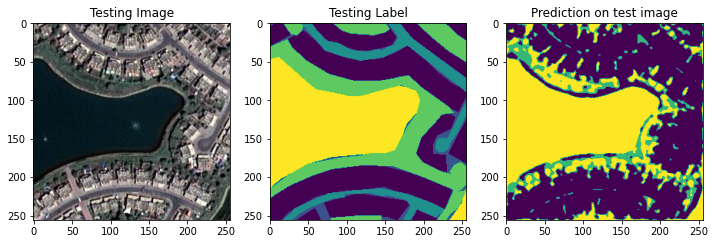

1/1 [==============================] - 0s 19ms/step


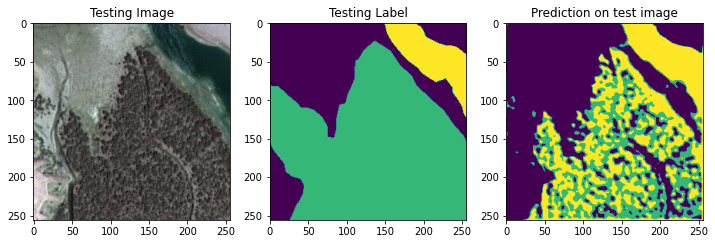

1/1 [==============================] - 0s 19ms/step


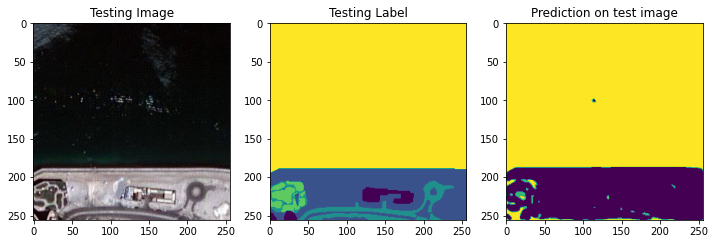

1/1 [==============================] - 0s 19ms/step


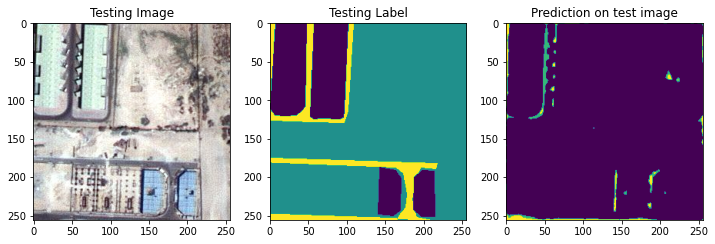

1/1 [==============================] - 0s 21ms/step


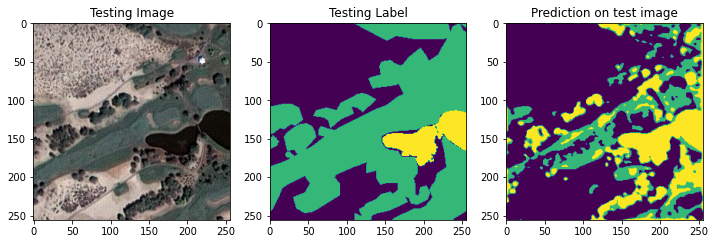

1/1 [==============================] - 0s 19ms/step


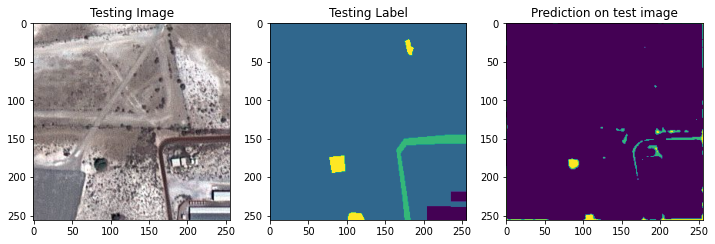

1/1 [==============================] - 0s 19ms/step


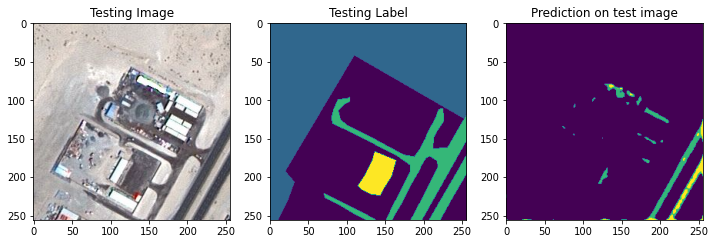

1/1 [==============================] - 0s 18ms/step


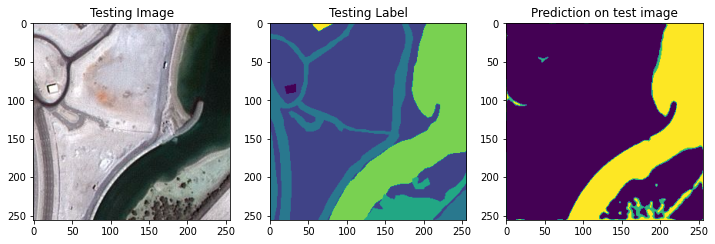

1/1 [==============================] - 0s 18ms/step


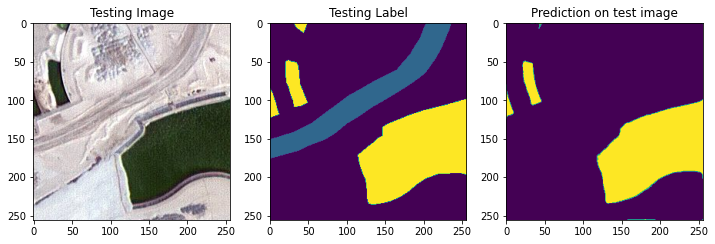

1/1 [==============================] - 0s 20ms/step


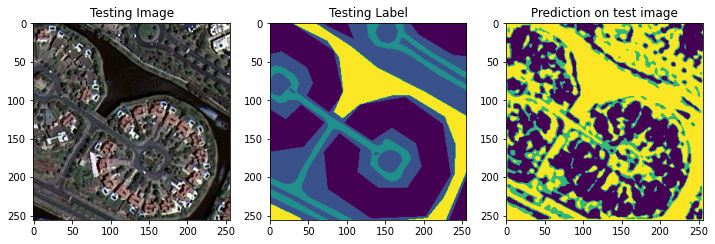

In [16]:
best = [0, 150, 142, 136, 129, 246, 235, 219, 211, 168]
for i in best:
  test_img = X_test[i]
  ground_truth=y_test[i]
  #test_img_norm=test_img[:,:,0][:,:,None]
  test_img_input=np.expand_dims(test_img, 0)
  prediction = (student_model.predict(test_img_input))
  predicted_img=np.argmax(prediction, axis=3)[0,:,:]
  ground_truth=np.argmax(ground_truth, axis=2)[:,:]

  plt.figure(figsize=(12, 8))
  plt.subplot(231)
  plt.title('Testing Image')
  plt.imshow(test_img)
  plt.subplot(232)
  plt.title('Testing Label')
  plt.imshow(ground_truth)
  plt.subplot(233)
  plt.title('Prediction on test image')
  plt.imshow(predicted_img)
  plt.show()

1/1 [==============================] - 0s 367ms/step


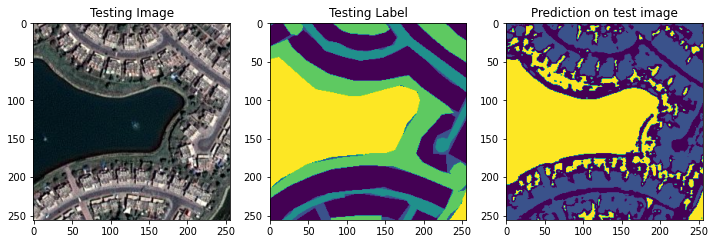

1/1 [==============================] - 0s 22ms/step


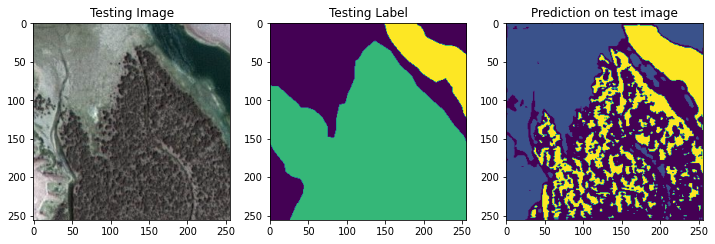

1/1 [==============================] - 0s 21ms/step


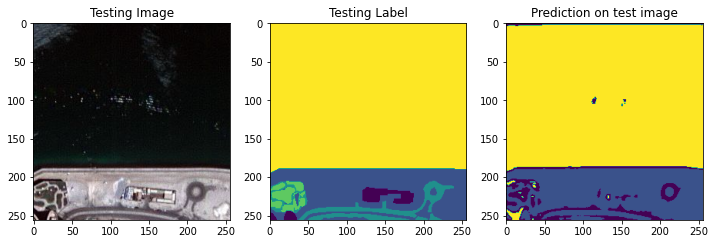

1/1 [==============================] - 0s 21ms/step


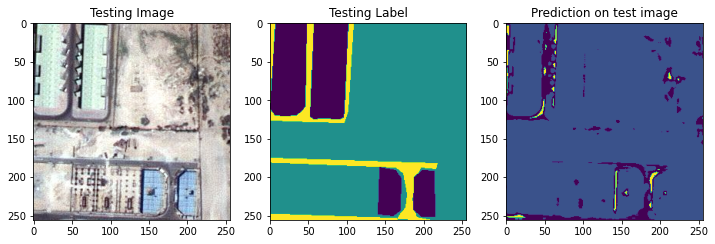

1/1 [==============================] - 0s 25ms/step


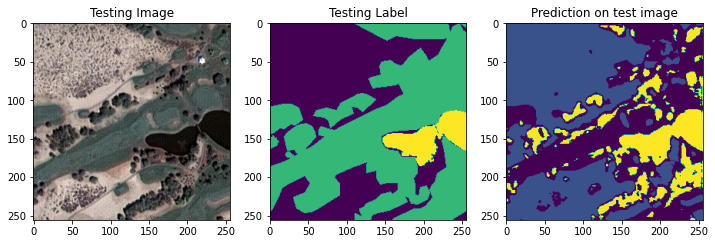

1/1 [==============================] - 0s 22ms/step


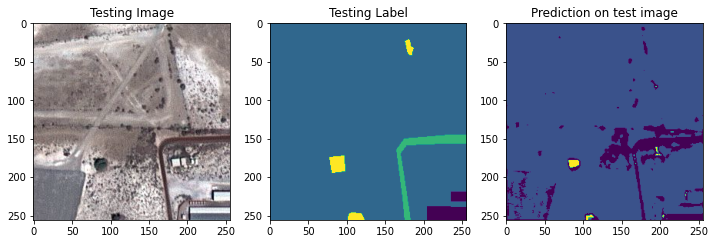

1/1 [==============================] - 0s 21ms/step


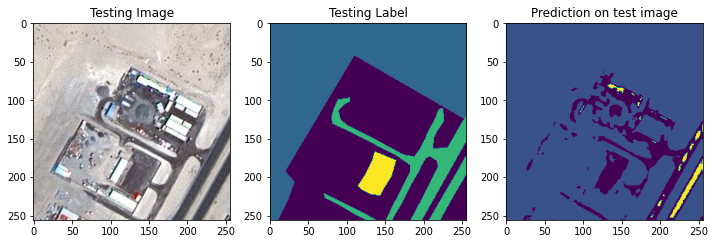

1/1 [==============================] - 0s 21ms/step


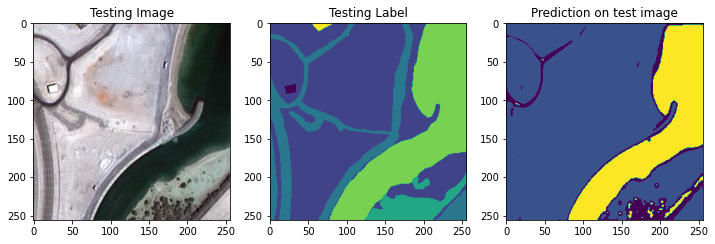

1/1 [==============================] - 0s 21ms/step


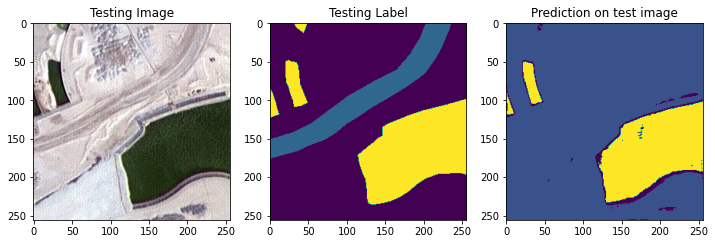

1/1 [==============================] - 0s 21ms/step


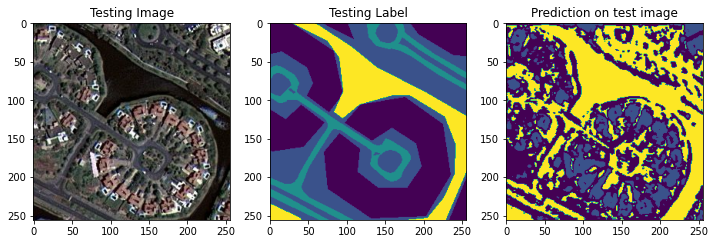

In [8]:
best = [0, 150, 142, 136, 129, 246, 235, 219, 211, 168]
for i in best:
  test_img = X_test[i]
  ground_truth=y_test[i]
  #test_img_norm=test_img[:,:,0][:,:,None]
  test_img_input=np.expand_dims(test_img, 0)
  prediction = (student_model.predict(test_img_input))
  predicted_img=np.argmax(prediction, axis=3)[0,:,:]
  ground_truth=np.argmax(ground_truth, axis=2)[:,:]

  plt.figure(figsize=(12, 8))
  plt.subplot(231)
  plt.title('Testing Image')
  plt.imshow(test_img)
  plt.subplot(232)
  plt.title('Testing Label')
  plt.imshow(ground_truth)
  plt.subplot(233)
  plt.title('Prediction on test image')
  plt.imshow(predicted_img)
  plt.show()